In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('tendulkar_ODI.csv')

In [8]:
df1 = df[~(df.Runs == 'DNB')]


/var/folders/87/l0yfwp4x0xb28tqnvwrh7qs80000gq/T/ipykernel_39578/2555028009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Runs']= df1['Runs'].apply(lambda x: x.rstrip('*'))
/var/folders/87/l0yfwp4x0xb28tqnvwrh7qs80000gq/T/ipykernel_39578/2555028009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Runs'] = pd.to_numeric(df1['Runs'], errors='coerce')


<Axes: >

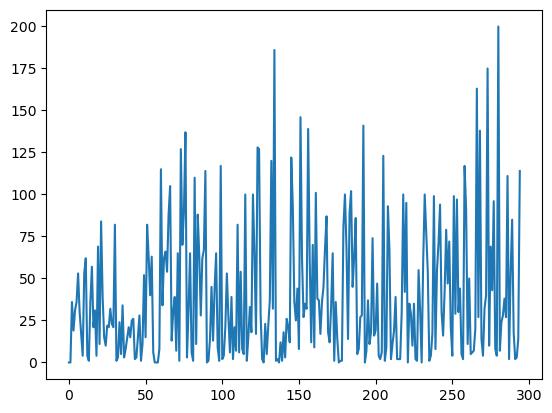

In [15]:

df1['Runs']= df1['Runs'].apply(lambda x: x.rstrip('*'))

df1['Runs'] = pd.to_numeric(df1['Runs'], errors='coerce')

# Remove rows where 'Runs' contains non-numeric values (NaN)
df1 = df1.dropna(subset=['Runs'])


<Axes: ylabel='Frequency'>

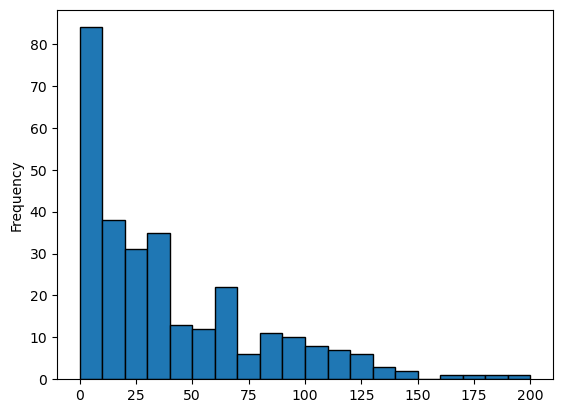

In [17]:
df1.Runs.plot(kind='hist', bins=20, edgecolor='black')

In [18]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [24]:
df2 = df1[~(df1['4s'] == '-')]

In [25]:
df2['4s'] = pd.to_numeric(df2['4s'])

<Axes: ylabel='Frequency'>

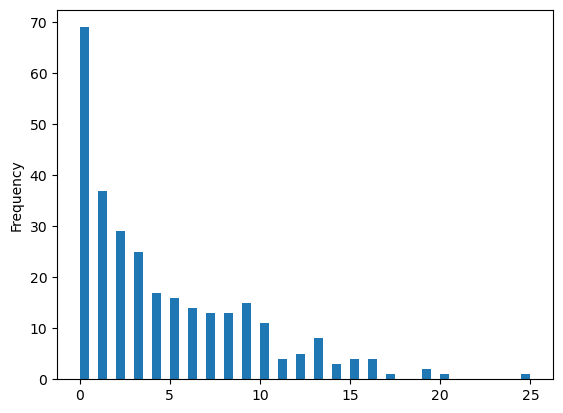

In [30]:
df2['4s'].plot(kind = 'hist', bins = 50)

In [38]:
news = pd.read_csv('popularity.csv')

In [41]:
news.columns = news.columns.str.strip()


In [43]:
mode = news['num_keywords'].mode()
print(mode)

0    7.0
Name: num_keywords, dtype: float64


In [44]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [50]:
print(news.shares.median())

1400.0


In [75]:
popularity = pd.read_csv('popularity_new.csv')

In [76]:
popularity.columns = popularity.columns.str.strip()


In [77]:
popularity.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [78]:
popularity.shares.quantile(0.78)

3100.0

In [79]:
percentiles_to_display = [10, 20, 30, 40, 50, 60, 70, 80, 90, 95]
for percentile in percentiles_to_display:
    calculated_percentile = popularity['shares'].quantile(percentile / 100.0)
    print(calculated_percentile)

708.0
870.6000000000004
1000.0
1200.0
1400.0
1800.0
2300.0
3400.0
6200.0
10800.0


In [80]:

    popularity = popularity[popularity.shares <= 10800]
# cols = ['shares'] # one or more

# Q1 = popularity[cols].quantile(0.25)
# Q3 = popularity[cols].quantile(0.75)
# IQR = Q3 - Q1

# popularity = popularity[~((popularity[cols] < (Q1 - 1.5 * IQR)) |(popularity[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [81]:
popularity.shares.describe()

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name: shares, dtype: float64

<Axes: >

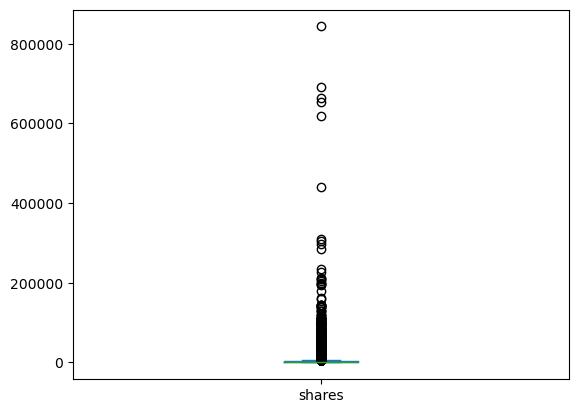

In [62]:
popularity.shares.plot(kind = 'box')

In [82]:
eda = pd.read_csv('eda_NAS.csv')

In [83]:
eda.columns


Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [87]:
eda['Science..']

0         NaN
1         NaN
2         NaN
3         NaN
4       27.27
        ...  
8796    34.55
8797      NaN
8798      NaN
8799    23.64
8800    27.27
Name: Science.., Length: 8801, dtype: float64

In [90]:
eda_groupby_watchTV = eda.groupby('Watch.TV')
eda_groupby_watchTV['Science..'].describe()

,count,mean,std,min,25%,50%,75%,max
Watch.TV,,,,,,,,
Every day,3113.0,36.357915,13.184537,0.00,27.27,34.55,43.64,85.45
Never,163.0,35.638589,13.387458,7.27,26.36,32.73,41.82,76.36
Once a month,142.0,36.786127,12.880244,16.36,27.27,34.55,41.82,74.55
Once a week,703.0,36.467112,13.202579,1.82,27.27,34.55,42.73,80.00


In [98]:
eda_groupby_fatherOcp = eda.groupby('Solve.Maths')
eda_groupby_fatherOcp['Maths..'].describe()

,count,mean,std,min,25%,50%,75%,max
Solve.Maths,,,,,,,,
Agree,2109.0,32.800920,15.927269,1.75,22.03,28.07,38.60,94.74
Disagree,1514.0,30.841321,13.226281,0.00,22.81,27.12,35.09,91.23
Neither,547.0,29.384388,13.510973,5.26,20.34,26.32,33.90,83.05


In [164]:
census = pd.read_csv('census.csv')


In [125]:
census.head()

,Table Name,State Code,Distt Code,Area Name,Area_Category,Age-group,Total_Persons,Total_Males,Total_Females,Illiterate_Persons,...,NTD_Females,Diploma_Persons,Diploma_Males,Diploma_Females,Graduate_Persons,Graduate_Males,Graduate_Females,Unclassified_Persons,Unclassified_Males,Unclassified_Females
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,0,136465,75715,60750
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,0,96524,52561,43963
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,0,70452,38456,31996


In [126]:
census_India = census[census['Area Name'] == 'INDIA']

In [135]:
census_byAge = census_India [census_India['Area_Category'] == 'Total']
census_byAge.shape

(29, 45)

In [136]:
census_byAge.head()

,Table Name,State Code,Distt Code,Area Name,Area_Category,Age-group,Total_Persons,Total_Males,Total_Females,Illiterate_Persons,...,NTD_Females,Diploma_Persons,Diploma_Males,Diploma_Females,Graduate_Persons,Graduate_Males,Graduate_Females,Unclassified_Persons,Unclassified_Males,Unclassified_Females
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,0,136465,75715,60750
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,0,96524,52561,43963
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,0,70452,38456,31996


In [138]:
census_byAge[['Age-group','Total_Persons','Illiterate_Persons']]

KeyError: "['Total_Persons'] not in index"

In [140]:
census_byAge.columns = census_byAge.columns.str.strip()
census_byAge[['Age-group','Total_Persons','Illiterate_Persons']]

,Age-group,Total_Persons,Illiterate_Persons
0,All ages,1210854977,447216165
1,0-6,164515253,164515253
2,7,24826640,6748214
3,8,26968373,4131414
4,9,23424638,2491904
5,10,30552107,3454505
6,11,24740946,1988473
7,12,27877307,2391529
8,13,24280683,1810476
9,14,25258169,2100785


In [141]:
census_byAge['litracy_rate'] = census_byAge['Illiterate_Persons'] / census_byAge['Total_Persons']

/var/folders/87/l0yfwp4x0xb28tqnvwrh7qs80000gq/T/ipykernel_39578/2040778486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_byAge['litracy_rate'] = census_byAge['Illiterate_Persons'] / census_byAge['Total_Persons']


In [160]:
census_byAge['litracy_rate'] = census_byAge['Illiterate_Persons'] / census_byAge['Total_Persons']

In [163]:
final

,Age-group,litracy_rate
1,0-6,1.000000
27,80+,0.610368
25,70-74,0.602255
26,75-79,0.580687
24,65-69,0.560560
23,60-64,0.530735
22,55-59,0.451695
21,50-54,0.424343
20,45-49,0.402414
19,40-44,0.370066


In [192]:
census = pd.read_csv('census.csv')


In [166]:
census.head()

,Table Name,State Code,Distt Code,Area Name,Area_Category,Age-group,Total_Persons,Total_Males,Total_Females,Illiterate_Persons,...,NTD_Females,Diploma_Persons,Diploma_Males,Diploma_Females,Graduate_Persons,Graduate_Males,Graduate_Females,Unclassified_Persons,Unclassified_Males,Unclassified_Females
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,0,136465,75715,60750
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,0,96524,52561,43963
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,0,70452,38456,31996


In [194]:
census = census[census.Area_Category == 'Total']
census.columns = census.columns.str.strip()

In [195]:
census = census[['Area Name', 'Total_Persons','Literate_Persons']]
census['litracy_rate'] = census['Literate_Persons'] / census['Total_Persons']
census_1 = census[['Area Name', 'litracy_rate']]
# census.columns = census.columns.str.strip()
# census_1 = census_1.sort_values(by = 'litracy_rate_female', ascending = False)

In [196]:
gb = census.groupby('Area Name').median().reset_index().sort_values(by='litracy_rate')
gb

,Area Name,Total_Persons,Literate_Persons,litracy_rate
5,State - BIHAR,2736174.0,1864305.0,0.597818
3,State - ARUNACHAL PRADESH,34077.0,27082.0,0.654110
14,State - JAMMU & KASHMIR,282049.0,230477.0,0.669513
15,State - JHARKHAND,790068.0,617015.0,0.672687
33,State - UTTAR PRADESH,5464146.0,4015786.0,0.684045
29,State - RAJASTHAN,1757598.0,1375033.0,0.688854
7,State - CHHATTISGARH,573965.0,494011.0,0.700353
22,State - MEGHALAYA,72802.0,57695.0,0.705464
4,State - ASSAM,734886.0,576530.0,0.713089
19,State - MADHYA PRADESH,1741842.0,1443152.0,0.717640
